In [1]:
from typing import List
from matplotlib import pyplot as plt

In [2]:
from lib.lbGraficas import cargaDataSet
from lib.lbGraficas import showGraficaCont
from lib.lbClima import cargaDfClima
from lib.lbClima import quitarHora
from lib.lbVarios import series_to_supervised
from lib.lbCargaDatosNorm import cargaDatosSep
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_squared_error
from os import path
import numpy
import pandas

Using TensorFlow backend.


In [3]:
#Carga datos contaminacion
dataset14 = cargaDataSet("datos/datosContaminacion/datos2014_DatosDiarios.txt") #datos 2014
dataset15 = cargaDataSet("datos/datosContaminacion/datos2015_DatosDiarios.txt") #datos 2015
dataset16 = cargaDataSet("datos/datosContaminacion/datos2016_DatosDiarios.txt") #datos 2016
#Para 2017 y 2018 cambia el formato del txt, entonces lo cogemos en csv ya directamente
dataset17 = pandas.read_csv('datos/datosContaminacion/datos17.csv',sep=';')
df17 = dataset17.drop(['V01', 'V02', 'V03', 'V04', 'V05', 'V06', 'V07', 'V08', 'V09', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31'], axis=1)
df17['Tecnica']='00'
df17['Periodo_Analisis']='04'
df17Filtrado = df17.loc[df17['ESTACION'] == 4]
df17Filtrado['ESTACION']='28079004'
dataset17 = df17Filtrado[['ESTACION','MAGNITUD','Tecnica','Periodo_Analisis','ANO','MES','D01','D02','D03','D04','D05','D06','D07','D08','D09','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','D31']]
#dataset17 = df17Filtrado.loc['ESTACION','MAGNITUD','Tecnica','Periodo_Analisis','ANO','MES','D01','D02','D03','D04','D05','D06','D07','D08','D09','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','D31']
dataset17.columns = ['Estacion','Magnitud','Tecnica','Periodo_Analisis','Año','Mes',"Dia1","Dia2","Dia3","Dia4","Dia5","Dia6","Dia7","Dia8","Dia9","Dia10","Dia11","Dia12","Dia13","Dia14","Dia15","Dia16","Dia17","Dia18","Dia19","Dia20","Dia21","Dia22","Dia23","Dia24","Dia25","Dia26","Dia27","Dia28","Dia29","Dia30","Dia31"]
print(dataset17.shape)

dataset18 = pandas.read_csv('datos/datosContaminacion/datos18.csv',sep=';')
df18 = dataset18.drop(['V01', 'V02', 'V03', 'V04', 'V05', 'V06', 'V07', 'V08', 'V09', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31'], axis=1)
df18['Tecnica']='00'
df18['Periodo_Analisis']='04'
df18Filtrado = df18.loc[df18['ESTACION'] == 4]
df18Filtrado['ESTACION']='28079004'
dataset18 = df18Filtrado[['ESTACION','MAGNITUD','Tecnica','Periodo_Analisis','ANO','MES','D01','D02','D03','D04','D05','D06','D07','D08','D09','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','D31']]
#dataset18 = df18Filtrado.loc['ESTACION','MAGNITUD','Tecnica','Periodo_Analisis','ANO','MES','D01','D02','D03','D04','D05','D06','D07','D08','D09','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','D31']
dataset18.columns = ['Estacion','Magnitud','Tecnica','Periodo_Analisis','Año','Mes',"Dia1","Dia2","Dia3","Dia4","Dia5","Dia6","Dia7","Dia8","Dia9","Dia10","Dia11","Dia12","Dia13","Dia14","Dia15","Dia16","Dia17","Dia18","Dia19","Dia20","Dia21","Dia22","Dia23","Dia24","Dia25","Dia26","Dia27","Dia28","Dia29","Dia30","Dia31"]
print(dataset18.shape)

dataset = pandas.concat([dataset14,dataset15,dataset16,dataset17,dataset18])
print(dataset.shape)
plzEspana = "28079004"
print("ahora filtramos y colocamos todos los días en orden")
values08 = showGraficaCont(dataset,plzEspana,"08",False) #valor de NO2 en cada día
values8 = showGraficaCont(dataset,plzEspana,"8",True) #valor de NO2 en cada día
print("Número de valores de 08: " + str(len(values08)) + " Y número de valores de 8: " + str(len(values8)))
values08 = values08 + values8
print("Longitud del conjunto de valores 08: ",len(values08))

(60, 37)
(20, 37)
(4535, 37)
ahora filtramos y colocamos todos los días en orden
Número de valores de 08: 1096 Y número de valores de 8: 485
Longitud del conjunto de valores 08:  1581


/home/adiaz/.conda/envs/meteo/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/adiaz/.conda/envs/meteo/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
values08 = numpy.array(values08)
values082D = values08.reshape(values08.shape[0],1)
scaler_VF = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(valuesFinal)
scaler_fit = scaler_VF.fit(values082D)
scaler_tra = scaler_VF.transform(values082D)
scaled = scaler_tra
print(scaled.shape) #sera 366 + 365
print(scaled[0])
print('------')
print(scaled[1])
print('------')
print(scaled[2])

(1581, 1)
[ 0.20588235]
------
[ 0.26470588]
------
[ 0.2745098]


In [5]:
""" :::::::::::::::::::: Define and Fit Model :::::::::::::::::::: """
n_train_days = round(1446)#292 #80% de 365 si queremos 2 años de entrenamiento 730
train_X=numpy.array(scaled[:n_train_days])
test_X=numpy.array(scaled[n_train_days:])
print(train_X.shape, test_X.shape)
serie=test_X[14:115]
print(serie.shape)

(1446, 1) (135, 1)
(101, 1)


In [6]:
def exponential_smothing(serie : List[float], factor = 0.1) -> List[float]:
    """
    serie : the elements to be predicted
    output: the prediction for each day.
            The first day predicted is the secod day.
            The last day predicted is the following to the las serie data.
    pre: serie must have at least one element.
    """
    if len(serie) == 0:
        raise NameError('serie must have at least one element')
    output = []
    counter = 0
    prediction = serie[0]
    output.append(prediction)
    for current in serie[1:]:
        prediction = current + factor * (current - prediction)
        output.append(prediction)
    return output

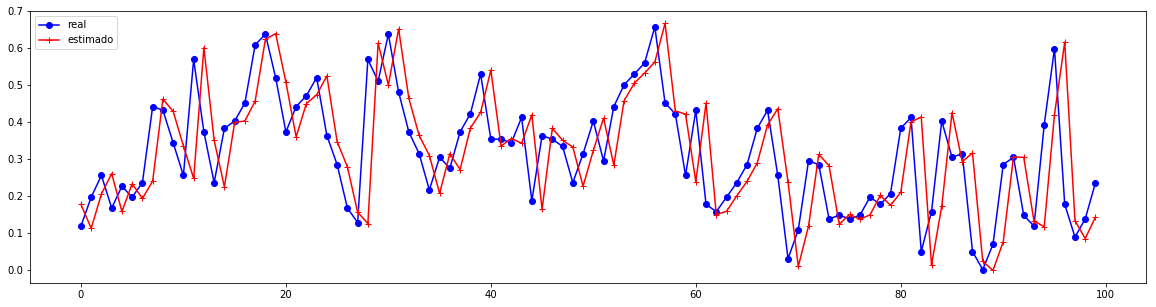

In [7]:
prediction = exponential_smothing(serie)
grp = plt.figure(figsize=(20,5))
plt.plot(serie[1:],"o-",color="blue",label="real")
plt.plot(prediction[:-1],"+-",color="red",label="estimado")
plt.legend()
plt.show()

In [8]:
def error(serie1 : List[float], serie2 : List[float]) -> float:
    """
    serie1 : elements to be compared
    serie2 : elements to be compared
    output : diference between series
    pre : serie1 and serie 2 must have the same number of elements
    """
    if len(serie1) != len(serie2):
        raise NameError('serie must have at least one element')
    output = 0.0
    for a,b in zip(serie1,serie2):
        error = abs(a-b)
        output += error
    return output/len(serie)

In [9]:
error(serie[1:],prediction[:-1])

array([ 0.10494958])

In [10]:
def standardDeviation(serie1 : List[float], serie2 : List[float]) -> float:
    """
    serie1 : elements to be compared
    serie2 : elements to be compared
    output : diference between series
    pre : serie1 and serie 2 must have the same number of elements
    """
    desv = []
    if len(serie1) != len(serie2):
        raise NameError('serie must have at least one element')
    output = 0.0
    for a,b in zip(serie1,serie2):
        error = abs(a-b)
        desv.append(error)
        output += error
    numpy.std(desv)
    return numpy.std(desv)

In [11]:
standardDeviation(serie[1:],prediction[:-1])

0.091650413007359696